In [ ]:
!apt install libgraphviz-dev
!python -m pip install osmnx networkx matplotlib==3.1.3 watermark pygraphviz pyvis

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 20 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-0 amd64 2.24.32-1ubuntu1 [1,769 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main

In [ ]:
import osmnx as ox
import pandas as pd
import matplotlib.colors as colors
import matplotlib.cm as cm
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network

In [ ]:
from IPython.core.display import display, HTML

def show_graph(nt):
  nt.show('example.html')
  display(HTML('example.html'))

In [ ]:
# TODO: para qué?
%matplotlib inline

# Introducción a los grafos

Un grafo es un conjunto de puntos que puede relacionarse con lineas. Al punto se le puede llamar vertices o nodo, y a las líneas, aristas o arco.

Una arista puede tener una dirección o ambas dirección, lo mismo ocurre sentido del trafico de una calle. Algunas pueden tener solo un sentido o ser bidireccionales.

## Ejemplo 1: Un simple grafo con NetworkX

In [ ]:
G = nx.Graph()
G.add_node(1)
G.add_node(2)

nx.draw(G, node_size=1500, node_color="#D43790", with_labels=True, pos={1:(1,2), 2: (2,2)})
plt.show()

Una arista que tiene una dirección se suele llamar: arco.

In [ ]:
G = nx.DiGraph()
G.add_node(1, size=25, label='1', title='lonely node', color="#D43790")
G.add_node(2, size=25, label='2', title='lonely node', color="#FC9432")
G.add_edge(1, 2)
plt.show()

nt = Network('700px', '700px', bgcolor="white", directed=True, notebook=True)
nt.from_nx(G)
show_graph(nt)

In [ ]:
G = nx.DiGraph()

graph_attr = { node : { "size": 25, "label" : str(node), "color" : "#D43790"} for node in range(1, 5) }
G.add_nodes_from([(node, attr) for (node, attr) in graph_attr.items()])
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)])

nt = Network('700px', '700px', bgcolor = "white", directed=True, notebook=True)
nt.from_nx(G)
show_graph(nt)

#### 

## Ejemplo 2: Grafos no dirigidos (bidireccionales)

Los grafos pueden tener aristas que no tiene una sola dirección (es decir carents de restricción), a estas le llamamos aristas no dirigidas.

In [ ]:
G = nx.Graph()
graph_attr = { node : { "size": 25, "label" : str(node), "color" : "#D43790"} for node in range(1, 7) }
G.add_nodes_from([(node, attr) for (node, attr) in graph_attr.items()])
G.add_edges_from([(1, 2), (2, 3), (4, 5), (5, 6), (1, 4), (3, 6)])

nt = Network('700px', '700px', bgcolor="white", directed=True, notebook=True)
nt.from_nx(G)
show_graph(nt)

### Operaciones básicas sobre grafos

#### Los vecinos y el grado de un nodo


In [ ]:
print("Neighbors from {}: {}".format(3, list(G.neighbors(3))))
print("Neighbors from {}: {}".format(6, list(G.neighbors(6))))

print("Degree from {}: {}".format(3, G.degree(3)))
print("Degree from {}: {}".format(6, G.degree(6)))

Neighbors from 3: [2, 6]
Neighbors from 6: [5, 3]
Degree from 3: 2
Degree from 6: 2


## Ejemplo 3: Representando una intersección con un grafo

A continuación presentamos como un grafo puede representar la intersección de dos calles de una ciudad. Donde el nodo 1 y 5 es una misma calle, y otra calle sería el nodo 4 y 2, finalmente el nodo 3 sería donde ambas calles se intersectan.

In [ ]:
G = nx.DiGraph()

nodes_attr = { node : { "size": 25, "label" : str(node), "color" : "Gray"} for node in range(1, 6) }
G.add_nodes_from([(node, attr) for (node, attr) in nodes_attr.items()])

labels = {(1, 3): "Calle A", 
          (3, 5): "Calle A", 
          (4, 3): "Calle B", 
          (3, 2): "Calle B"}

edges_attr = { edge : { "size": 25, "title" : labels[edge], "color" : "#D43790"} for edge in [(1,3), (3, 5), (4, 3), (3, 2)] }

G.add_edges_from([(e[0], e[1], attr) for (e, attr) in edges_attr.items()])

G.nodes[3]['color'] = "#D43790"

nt = Network('700px', '700px', bgcolor="white", directed=True, notebook=True)
nt.from_nx(G)
show_graph(nt)

In [ ]:
G = nx.Graph()
edge_attr = { (i, j) : { "size": 25, "color" : "Gray", "physics": True} for i in range(0, 10) for j in range(0, 10) if i != j }
G.add_edges_from([(e[0], e[1], attr) for (e, attr) in edge_attr.items()])

for i in G.nodes:
  G.nodes[i]["color"] = "#D43790"

for i in G.nodes:
 G.nodes[i]["x"] = e[1]
 G.nodes[i]["y"] = -e[0]


nt = Network('700px', '700px', bgcolor="white", directed=False, notebook=True)
nt.from_nx(G)
nt.show_buttons(filter_=['physics'])
show_graph(nt)

NameError: ignored

## Ejemplo 4: Redes sociales (Erdős–Rényi)

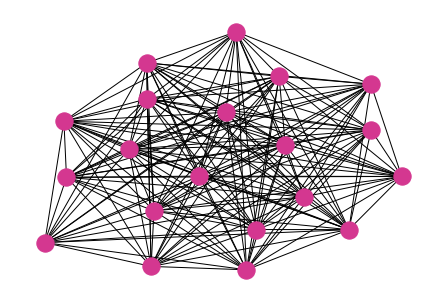

In [ ]:
G = nx.erdos_renyi_graph(20, 0.9)

nx.draw(G, node_color="#D43790")
plt.show()



[Intro a las redes complejas](https://medium.com/analytics-vidhya/introduction-to-complex-network-analysis-15b50947a794)

[Libro: Network Sciecnce, Barabási](http://networksciencebook.com/)

# Redes urbanas

In [ ]:
# parameters
CITY="Granada, Spain"
DIST=500 # metros
NETWORK_TYPE = "bike" # {"all_private", "all", "bike", "drive", "drive_service", "walk"}

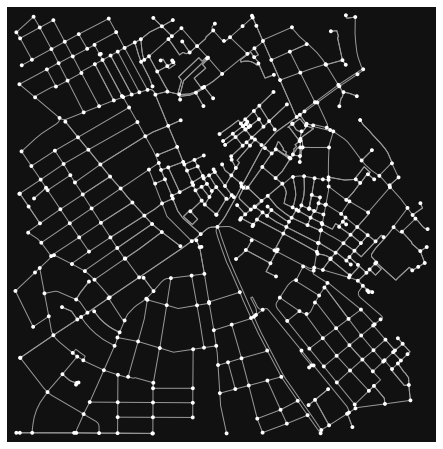

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff45c5da790>)

In [ ]:
G = ox.graph_from_address(CITY,
                          dist=DIST, 
                          network_type=NETWORK_TYPE,
                          )
#  G = ox.project_graph(G) # TODO: revisar si es necesario proyectar
ox.plot_graph(G)

In [ ]:
# ref: https://geoffboeing.com/2016/11/osmnx-python-street-networks/
basic_stats = ox.basic_stats(G)
print(basic_stats['circuity_avg'])

1.0322431838173192


In [ ]:
# ref: https://geoffboeing.com/2016/11/osmnx-python-street-networks/
extended_stats = ox.extended_stats(G, bc=True)
print(extended_stats['betweenness_centrality_avg'])

/usr/local/lib/python3.7/dist-packages/osmnx/stats.py:458: UserWarning: The extended_stats function has been deprecated and will be removed in a future release. Use NetworkX directly for extended topological measures.


0.03243518480276529


# Grafo en Networkx

In [ ]:
type(G)

networkx.classes.multidigraph.MultiDiGraph

# Nodos

In [ ]:
nodes_df = pd.DataFrame.from_dict(G.nodes, orient='index')

In [ ]:
nodes_df.head()

,y,x,street_count,highway
21478300,37.177440,-3.598445,4,NaN
49937392,37.173852,-3.594547,3,NaN
49937395,37.172287,-3.595887,3,NaN
49937474,37.176286,-3.601348,3,NaN
49937476,37.176293,-3.600706,6,NaN


## Arcos

In [ ]:
edge_df = nx.to_pandas_edgelist(G)

/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [ ]:
edge_df.head()

,source,target,name,highway,width,tunnel,length,service,geometry,access,osmid,oneway,lanes,maxspeed
0,21478300,503905703,Calle Gran Vía de Colón,primary,NaN,NaN,39.607,NaN,NaN,NaN,478458110,False,3,30
1,21478300,1672421873,Calle Cárcel Baja,secondary,NaN,NaN,26.834,NaN,"LINESTRING (-3.5984452 37.1774397, -3.598498 3...",NaN,28238532,True,1,30
2,21478300,582274727,Calle Gran Vía de Colón,primary,NaN,NaN,49.500,NaN,"LINESTRING (-3.5984452 37.1774397, -3.5983756 ...",NaN,1059078526,False,3,30
3,49937392,1694984287,Plaza de Fortuny,secondary,NaN,NaN,20.898,NaN,NaN,NaN,513660221,True,1,30
4,49937392,1676724044,Calle Portería de Santo Domingo,residential,NaN,NaN,56.871,NaN,"LINESTRING (-3.5945473 37.1738521, -3.5945778 ...",NaN,"[118183626, 155265059]",True,1,30


In [ ]:
# ref: https://max-coding.medium.com/osmnx-part-1-loading-data-from-open-street-maps-and-finding-shortest-route-between-two-points-5bb073b0a27d
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

In [ ]:
edge_df = nx.to_pandas_edgelist(G)

/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [ ]:
edge_df.head()

,source,target,name,highway,speed_kph,width,travel_time,tunnel,length,service,geometry,access,osmid,oneway,lanes,maxspeed
0,21478300,503905703,Calle Gran Vía de Colón,primary,30.0,NaN,4.8,NaN,39.607,NaN,NaN,NaN,478458110,False,3,30
1,21478300,1672421873,Calle Cárcel Baja,secondary,30.0,NaN,3.2,NaN,26.834,NaN,"LINESTRING (-3.5984452 37.1774397, -3.598498 3...",NaN,28238532,True,1,30
2,21478300,582274727,Calle Gran Vía de Colón,primary,30.0,NaN,5.9,NaN,49.500,NaN,"LINESTRING (-3.5984452 37.1774397, -3.5983756 ...",NaN,1059078526,False,3,30
3,49937392,1694984287,Plaza de Fortuny,secondary,30.0,NaN,2.5,NaN,20.898,NaN,NaN,NaN,513660221,True,1,30
4,49937392,1676724044,Calle Portería de Santo Domingo,residential,30.0,NaN,6.8,NaN,56.871,NaN,"LINESTRING (-3.5945473 37.1738521, -3.5945778 ...",NaN,"[118183626, 155265059]",True,1,30


# Medidas de centralidad

## Centralidad de nodos

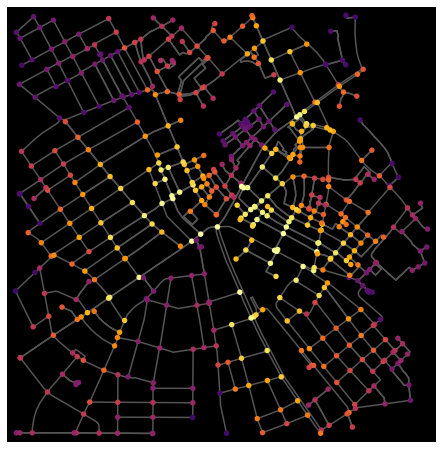

In [ ]:
# ref: https://github.com/gboeing/osmnx-examples/blob/v0.11/notebooks/08-example-line-graph.ipynb

# node closeness centrality
node_centrality = nx.closeness_centrality(G)

# plot it
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.plot.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)

## Centralidad de arcos

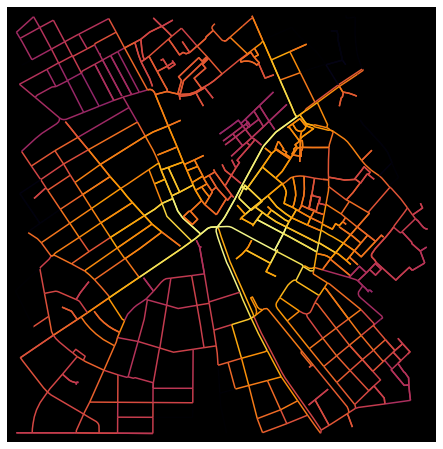

In [ ]:
# TODO: actualizar/limpiar el código?
# ref: https://github.com/gboeing/osmnx-examples/blob/v0.11/notebooks/08-example-line-graph.ipynb

# edge closeness centrality: convert graph to a line graph so edges become nodes and vice versa
edge_centrality = nx.closeness_centrality(nx.line_graph(G))
# list of edge values for the orginal graph
ev = [edge_centrality[edge + (0,)] for edge in G.edges()]

# color scale converted to list of colors for graph edges
norm = colors.Normalize(vmin=min(ev)*0.8, vmax=max(ev))
cmap = cm.ScalarMappable(norm=norm, cmap=cm.inferno)
ec = [cmap.to_rgba(cl) for cl in ev]

# color the edges in the original graph with closeness centralities in the line graph
fig, ax = ox.plot_graph(G, bgcolor='k', 
                        # axis_off=True, # TODO: deprecated 
                        node_size=0, node_color='w', node_edgecolor='gray', node_zorder=2,
                        edge_color=ec, edge_linewidth=1.5, edge_alpha=1)

In [ ]:
# TODO: hacer lo mismo para betweenness centrality, que es un proxy para tránsito

# Extra: Grafo con las vías de tren

In [ ]:
# ref: https://github.com/gboeing/osmnx-examples/blob/main/notebooks/08-custom-filters-infrastructure.ipynb

ox.settings.useful_tags_way += ["railway"]
G_train = ox.graph_from_place(
    "Spain",
    retain_all=False,
    truncate_by_edge=True,
    simplify=True,
    custom_filter='["railway"~"subway"]',
)

fig, ax = ox.plot_graph(G, node_size=0, edge_color="w", edge_linewidth=0.2)

KeyboardInterrupt: ignored

# Watermark

In [ ]:
%load_ext watermark
%watermark -n -u -v -iv -w

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: Sat Aug 13 2022

Python implementation: CPython
Python version       : 3.7.13
IPython version      : 5.5.0

IPython: 5.5.0
osmnx  : 1.1.2

Watermark: 2.3.1

